# Exploración de datos

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
from functools import reduce

project_path = os.path.abspath('../..')
sys.path.insert(1, project_path)

import pandas as pd
import numpy as np
from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from src.utils import get_project_root
from src.data.make_dataset import get_minma_data
from src.visualization.trends import visualizar_trends
from src.visualization.eda import *
from src.visualization.clustering import *

## EDA - {datos}

### Carga de datos 

In [2]:
params = ['SO2','NO2', 'NO', 'NOX', 'O3'] # NO HAY CO
ma_params =['velviento', 'dirviento'] #no hay temp
from_last = '5y'
data_df = get_minma_data(params, 'ventanas', from_last=from_last)
#pd.read_excel(get_project_root() / 'data' / 'raw' / 'CEMS industrial datos Quintero.xlsx', header=2, index_col=0)

C:\Users\javie\AppData\Local\Temp/ipykernel_8780/1313391430.py:4: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  data_df = get_minma_data(params, 'ventanas', from_last=from_last)


In [3]:
data_df.head()

,Registros validados_SO2,Registros preliminares_SO2,Registros no validados_SO2,Registros validados_NO2,Registros preliminares_NO2,Registros no validados_NO2,Registros validados_NO,Registros preliminares_NO,Registros no validados_NO,Registros validados_NOX,Registros preliminares_NOX,Registros no validados_NOX,Registros validados_O3,Registros preliminares_O3,Registros no validados_O3
2017-10-04 18:00:00,NaN,NaN,2.31,NaN,NaN,4.54,NaN,NaN,2.05393,NaN,NaN,6.50358,NaN,NaN,15.0
2017-10-04 19:00:00,NaN,NaN,2.12,NaN,NaN,3.65,NaN,NaN,1.63730,NaN,NaN,5.28568,NaN,NaN,16.0
2017-10-04 20:00:00,NaN,NaN,2.15,NaN,NaN,3.59,NaN,NaN,1.64193,NaN,NaN,5.22860,NaN,NaN,17.0
2017-10-04 21:00:00,NaN,NaN,2.01,NaN,NaN,3.40,NaN,NaN,1.67473,NaN,NaN,5.07702,NaN,NaN,16.0
2017-10-04 22:00:00,NaN,NaN,2.11,NaN,NaN,3.40,NaN,NaN,1.62698,NaN,NaN,5.02203,NaN,NaN,16.0


### Data info

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43830 entries, 2017-10-04 18:00:00 to 2022-10-04 23:00:00
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Registros validados_SO2     0 non-null      float64
 1   Registros preliminares_SO2  0 non-null      float64
 2   Registros no validados_SO2  43310 non-null  float64
 3   Registros validados_NO2     0 non-null      float64
 4   Registros preliminares_NO2  0 non-null      float64
 5   Registros no validados_NO2  43221 non-null  float64
 6   Registros validados_NO      0 non-null      float64
 7   Registros preliminares_NO   0 non-null      float64
 8   Registros no validados_NO   43226 non-null  float64
 9   Registros validados_NOX     0 non-null      float64
 10  Registros preliminares_NOX  0 non-null      float64
 11  Registros no validados_NOX  43223 non-null  float64
 12  Registros validados_O3      0 non-null      float64
 

In [5]:
cols_to_drop = list(data_df.filter(regex='(?<!no validados)_.*')) 
data_df = data_df.drop(cols_to_drop, axis=1)
data_df = data_df.rename(columns={"Registros no validados_SO2": "SO2", "Registros no validados_NO2": "NO2", "Registros no validados_NO": "NO", "Registros no validados_NOX": "NOX", "Registros no validados_O3": "O3", "Registros no validados_CO": "CO"})

In [6]:
ma_df = get_minma_data(ma_params, 'ventanas', from_last=from_last, n_cols = 3)
ma_df = ma_df.rename(columns={"Unnamed: 2_velviento": "VelViento", "Unnamed: 2_temp": "Temperatura", "Unnamed: 2_dirviento": "DirViento"})
data_df = data_df.join(ma_df)

C:\Users\javie\AppData\Local\Temp/ipykernel_8780/2876595985.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  ma_df = get_minma_data(ma_params, 'ventanas', from_last=from_last, n_cols = 3)


In [7]:
data_df.head()

,SO2,NO2,NO,NOX,O3,VelViento,DirViento
2017-10-04 18:00:00,2.31,4.54,2.05393,6.50358,15.0,NaN,NaN
2017-10-04 19:00:00,2.12,3.65,1.63730,5.28568,16.0,NaN,NaN
2017-10-04 20:00:00,2.15,3.59,1.64193,5.22860,17.0,NaN,NaN
2017-10-04 21:00:00,2.01,3.40,1.67473,5.07702,16.0,NaN,NaN
2017-10-04 22:00:00,2.11,3.40,1.62698,5.02203,16.0,NaN,NaN


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43830 entries, 2017-10-04 18:00:00 to 2022-10-04 23:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SO2        43310 non-null  float64
 1   NO2        43221 non-null  float64
 2   NO         43226 non-null  float64
 3   NOX        43223 non-null  float64
 4   O3         43286 non-null  float64
 5   VelViento  43617 non-null  float64
 6   DirViento  43617 non-null  float64
dtypes: float64(7)
memory usage: 3.7 MB


### Visualización inicial

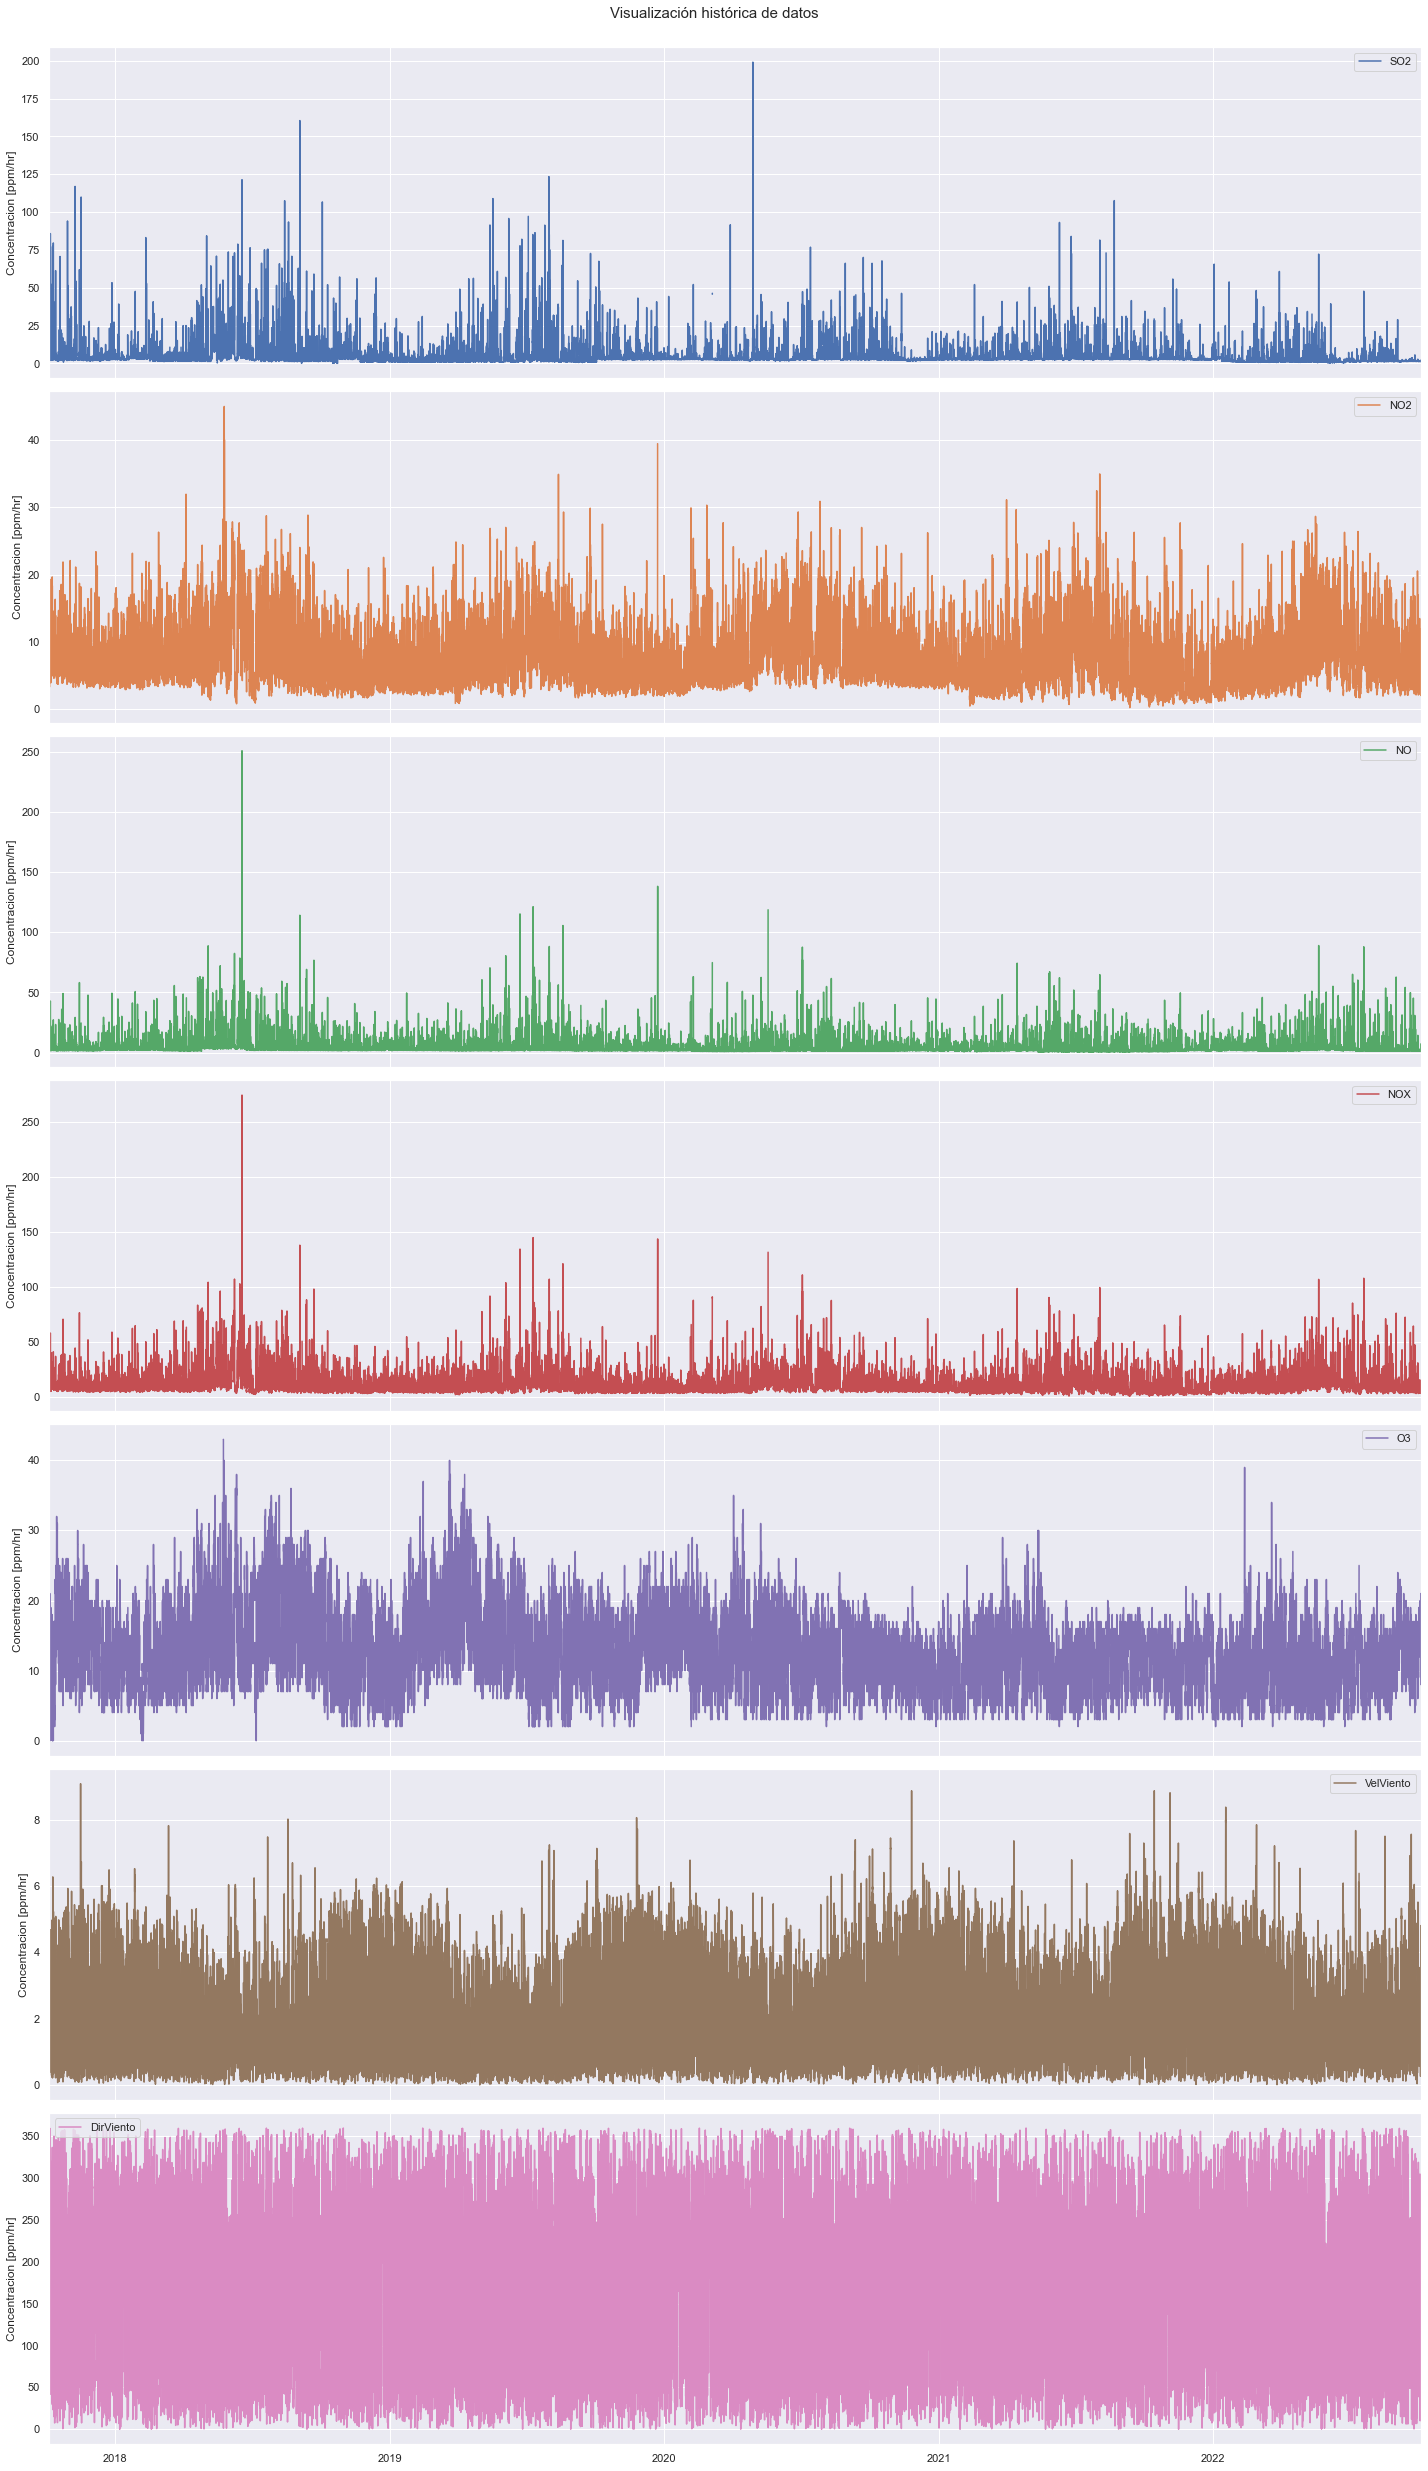

In [9]:
# ylabel_list -> label en eje y para cada variable
series_plot(data_df,
            ylabel_list=['Concentracion [ppm/hr]']*data_df.shape[1])

### Datos nulos

In [10]:
data_df.isna().sum()

SO2          520
NO2          609
NO           604
NOX          607
O3           544
VelViento    213
DirViento    213
dtype: int64

D:\Universidad\Especialidad\Ingenieria Matematica\10mo Semestre\Proyecto MDS\mds7201-minma-so2\src\visualization\eda.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)


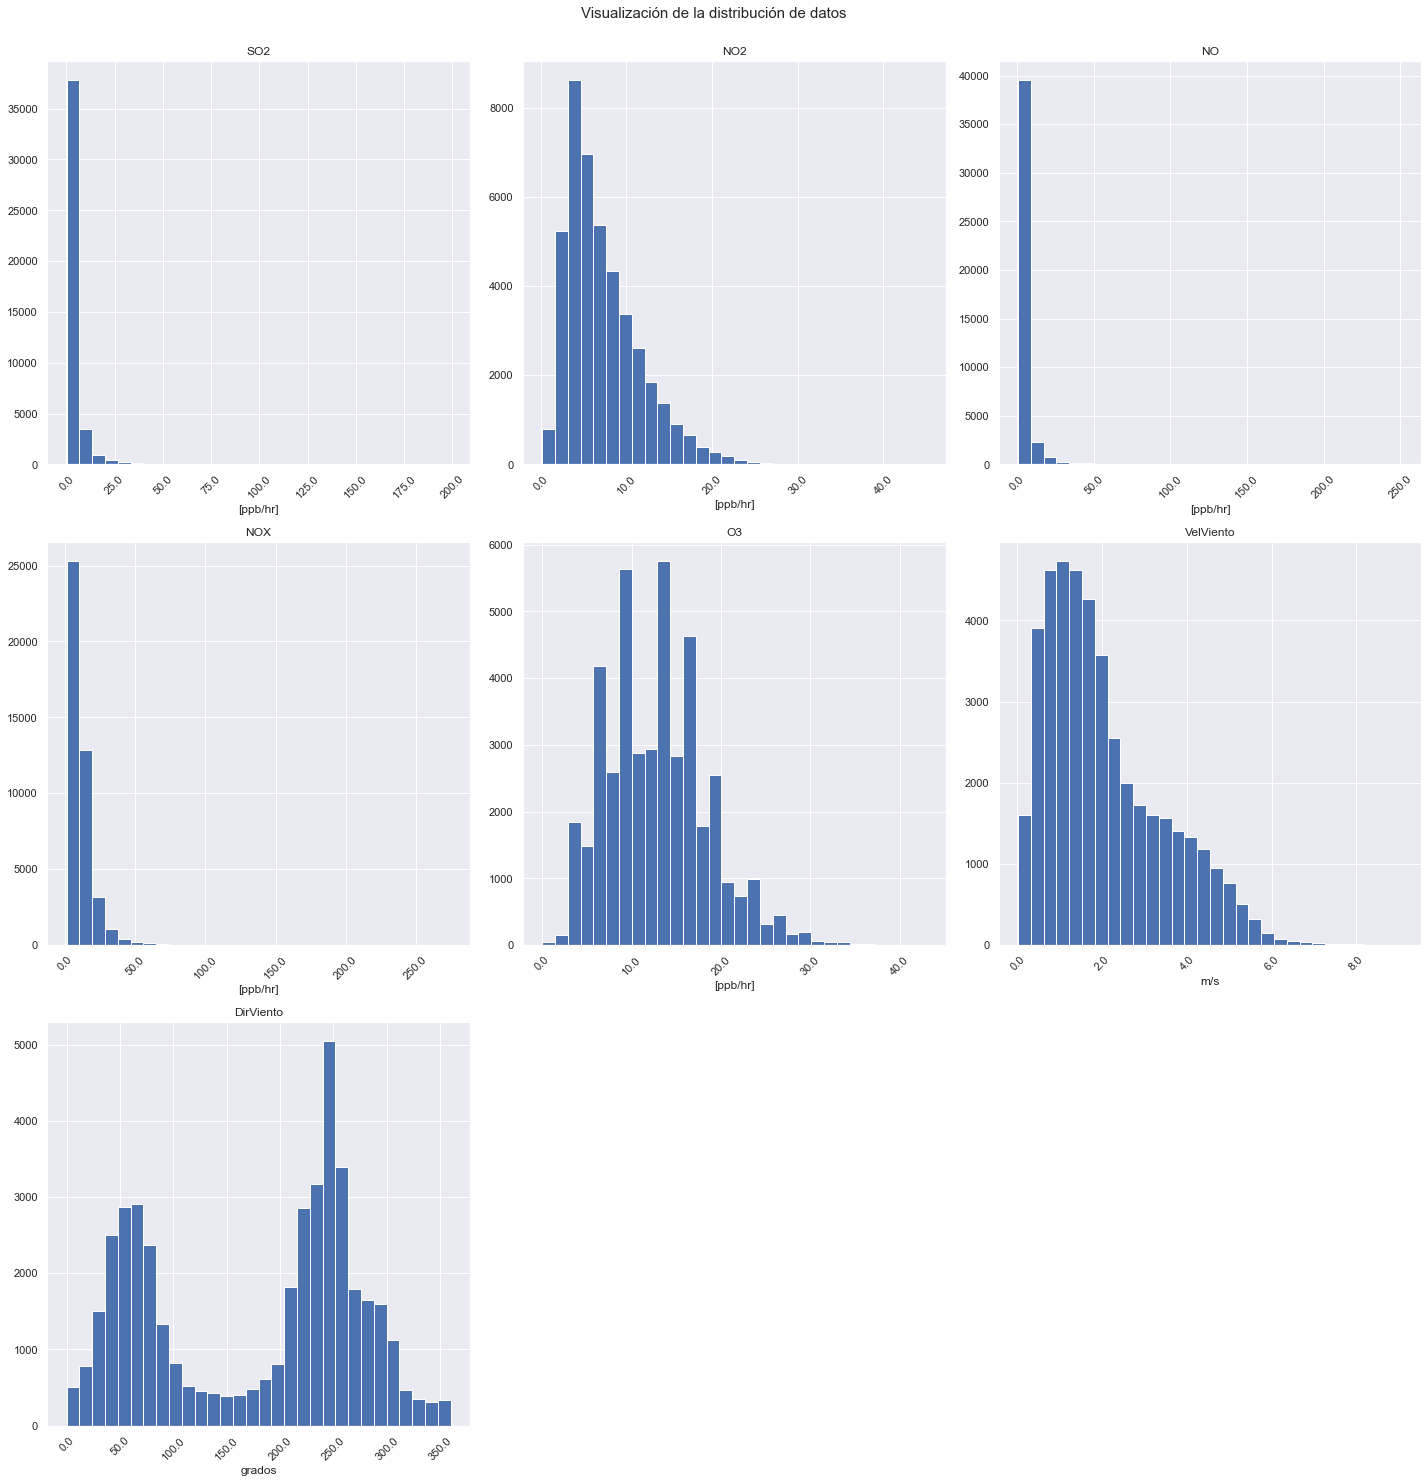

In [11]:
# xlabel_list -> label en eje x para cada variable
#args = {'xscale':'log', 'yscale':'log'} # -> Descomentar para aplica escala logaritmica 
hist_plot(data_df, xlabel_list=['[ppb/hr]']*(data_df.shape[1]-2) + ["m/s"] + ["grados"], n_rows = 3) #, **args) #-> Opcional para escala logaritmica, u otros parámetros

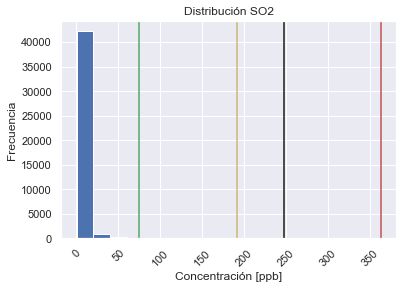

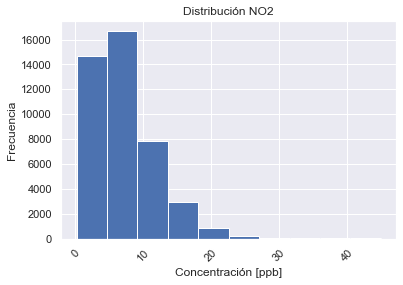

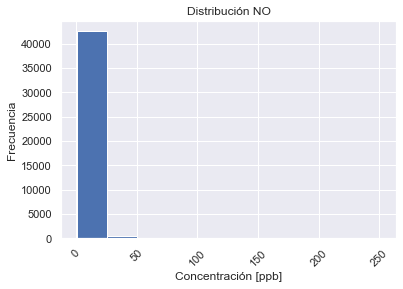

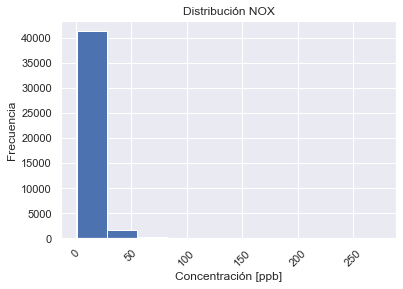

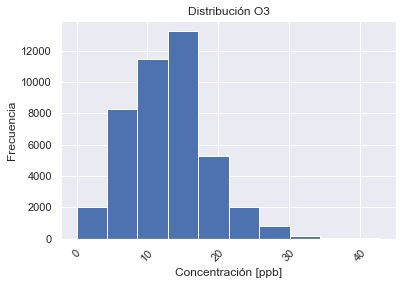

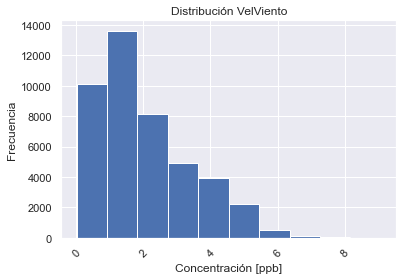

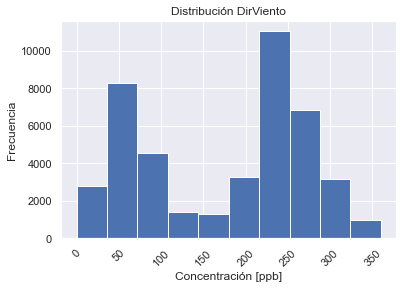

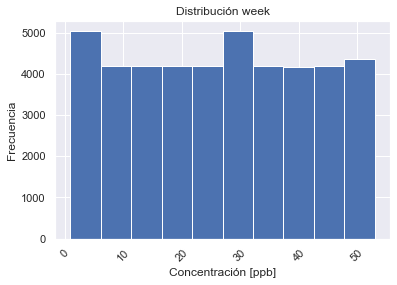

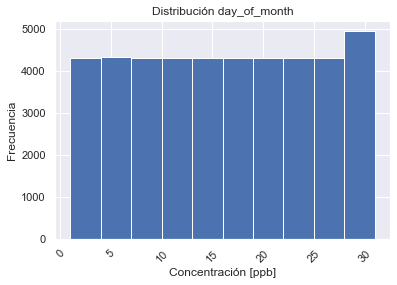

In [77]:
norma = {"SO2": [75,191,248,363]}
for col in data_df.columns[:-2]:
    data_df.hist(col)
    #sns.countplot(concon_df[col])
    if col in norma:
        plt.axvline(x=norma[col][0],c='g')
        plt.axvline(x=norma[col][1],c='y')
        plt.axvline(x=norma[col][2],c='k')
        plt.axvline(x=norma[col][3],c='r')
    plt.title("Distribución "+ col)
    plt.xticks(rotation=45)
    plt.xlabel("Concentración [ppb]")
    plt.ylabel("Frecuencia")
    plt.show()

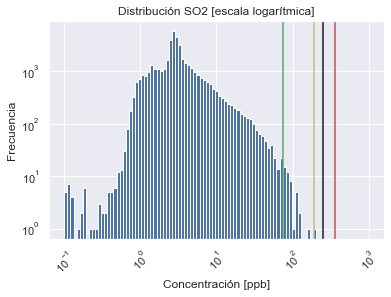

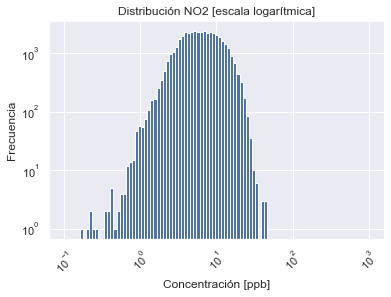

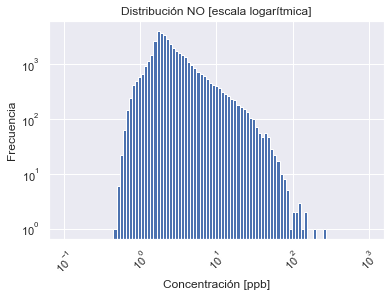

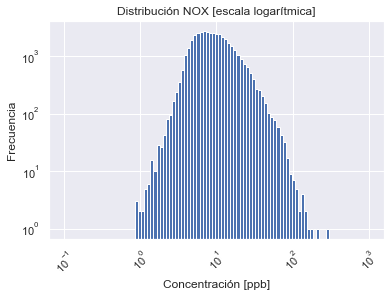

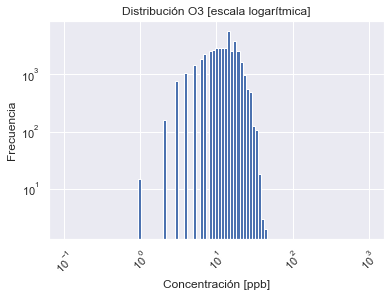

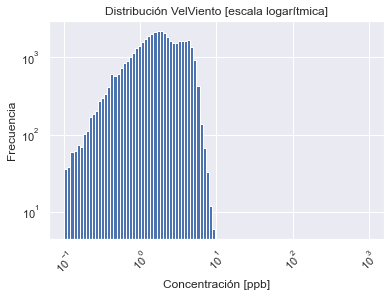

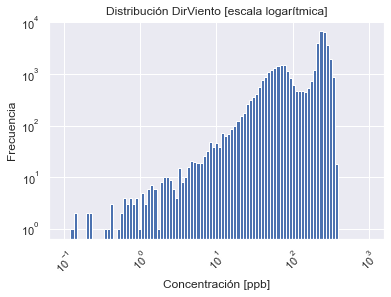

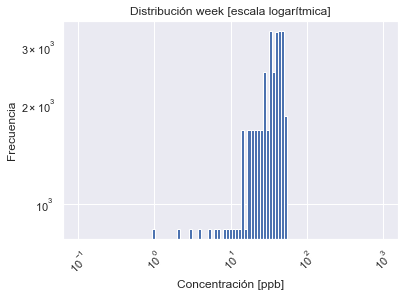

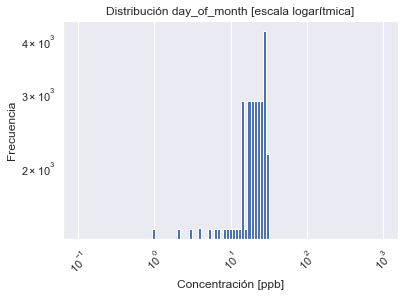

In [75]:
norma = {"SO2": [75,191,248,363]}
for col in data_df.columns[:-2]:
    data_df.hist(col, bins = np.logspace(-1,3,100), log =True)
    #sns.countplot(concon_df[col])
    if col in norma:
        plt.axvline(x=norma[col][0],c='g')
        plt.axvline(x=norma[col][1],c='y')
        plt.axvline(x=norma[col][2],c='k')
        plt.axvline(x=norma[col][3],c='r')
    plt.title("Distribución "+ col + " [escala logarítmica]")
    plt.xscale("log")
    plt.xticks(rotation=45)
    plt.xlabel("Concentración [ppb]")
    plt.ylabel("Frecuencia")
    plt.show()

### Resumen estadístico

In [13]:
data_df.describe()

,SO2,NO2,NO,NOX,O3,VelViento,DirViento
count,43310.000000,43221.000000,43226.000000,43223.000000,43286.000000,43617.000000,43617.000000
mean,4.405123,7.279157,4.052840,11.302148,12.859146,2.038648,176.227112
std,6.253030,4.398773,6.140964,9.081920,5.580760,1.387662,96.921072
min,0.070000,0.170000,0.443233,0.902985,0.000000,0.009623,0.003069
25%,2.240000,3.970000,1.694608,5.969825,9.000000,0.969853,71.185500
50%,2.840000,6.160000,2.261500,8.737320,12.000000,1.678210,217.103000
75%,4.070000,9.590000,3.828350,13.418000,16.000000,2.874360,252.224000
max,199.110000,45.030000,251.305000,274.893000,43.000000,9.080660,359.959000


### Cantidad de datos por fecha

### Lag plots

#### 1 hora

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

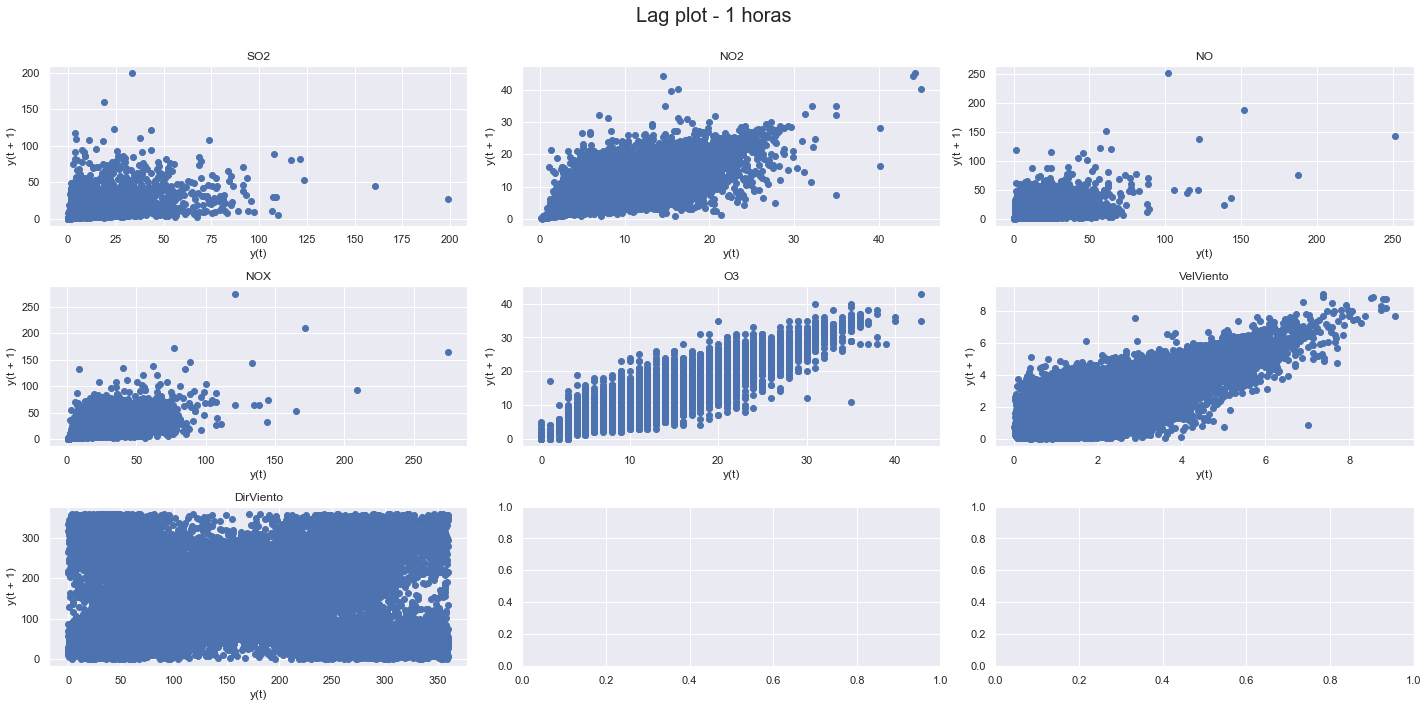

In [14]:
lag_plot(data_df, lag=1, unit='horas')

#### 1 día

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

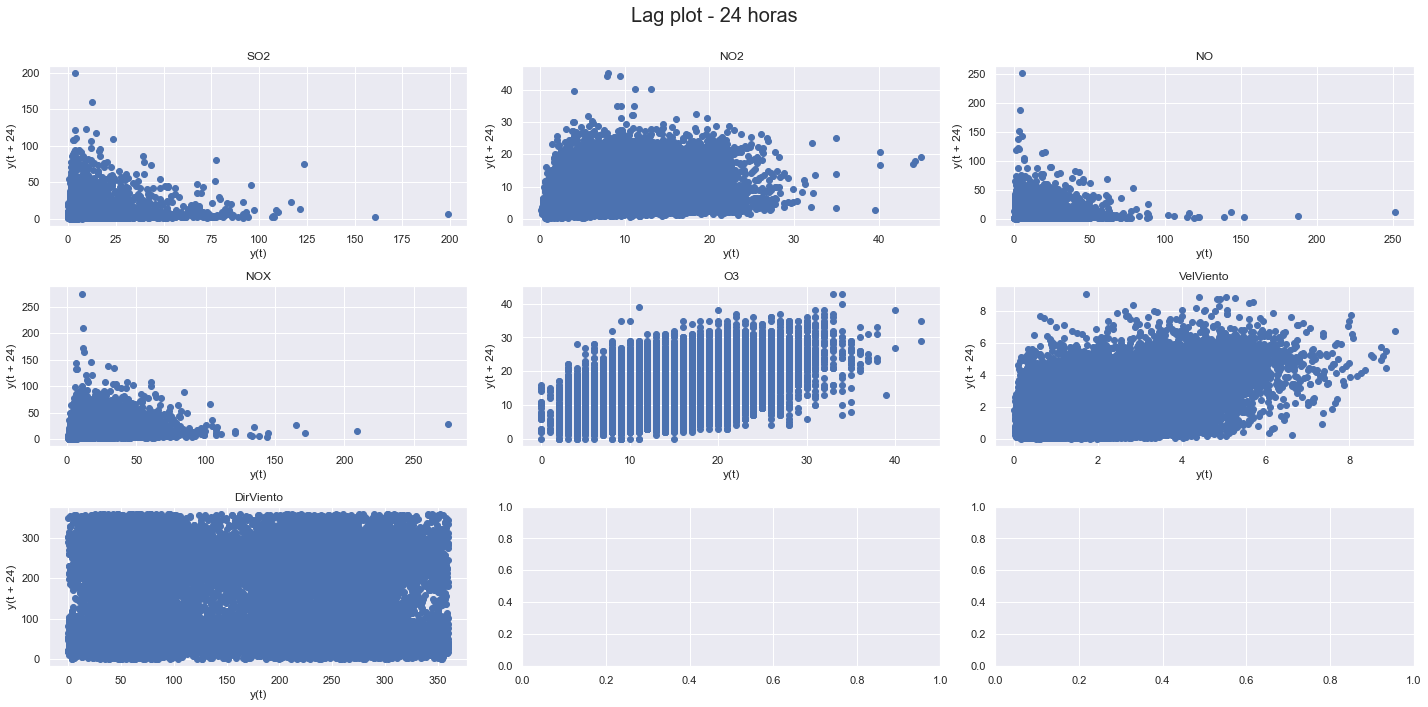

In [15]:
lag_plot(data_df, lag=24, unit='horas')

### Correlaciones entre datos

#### Pair plot

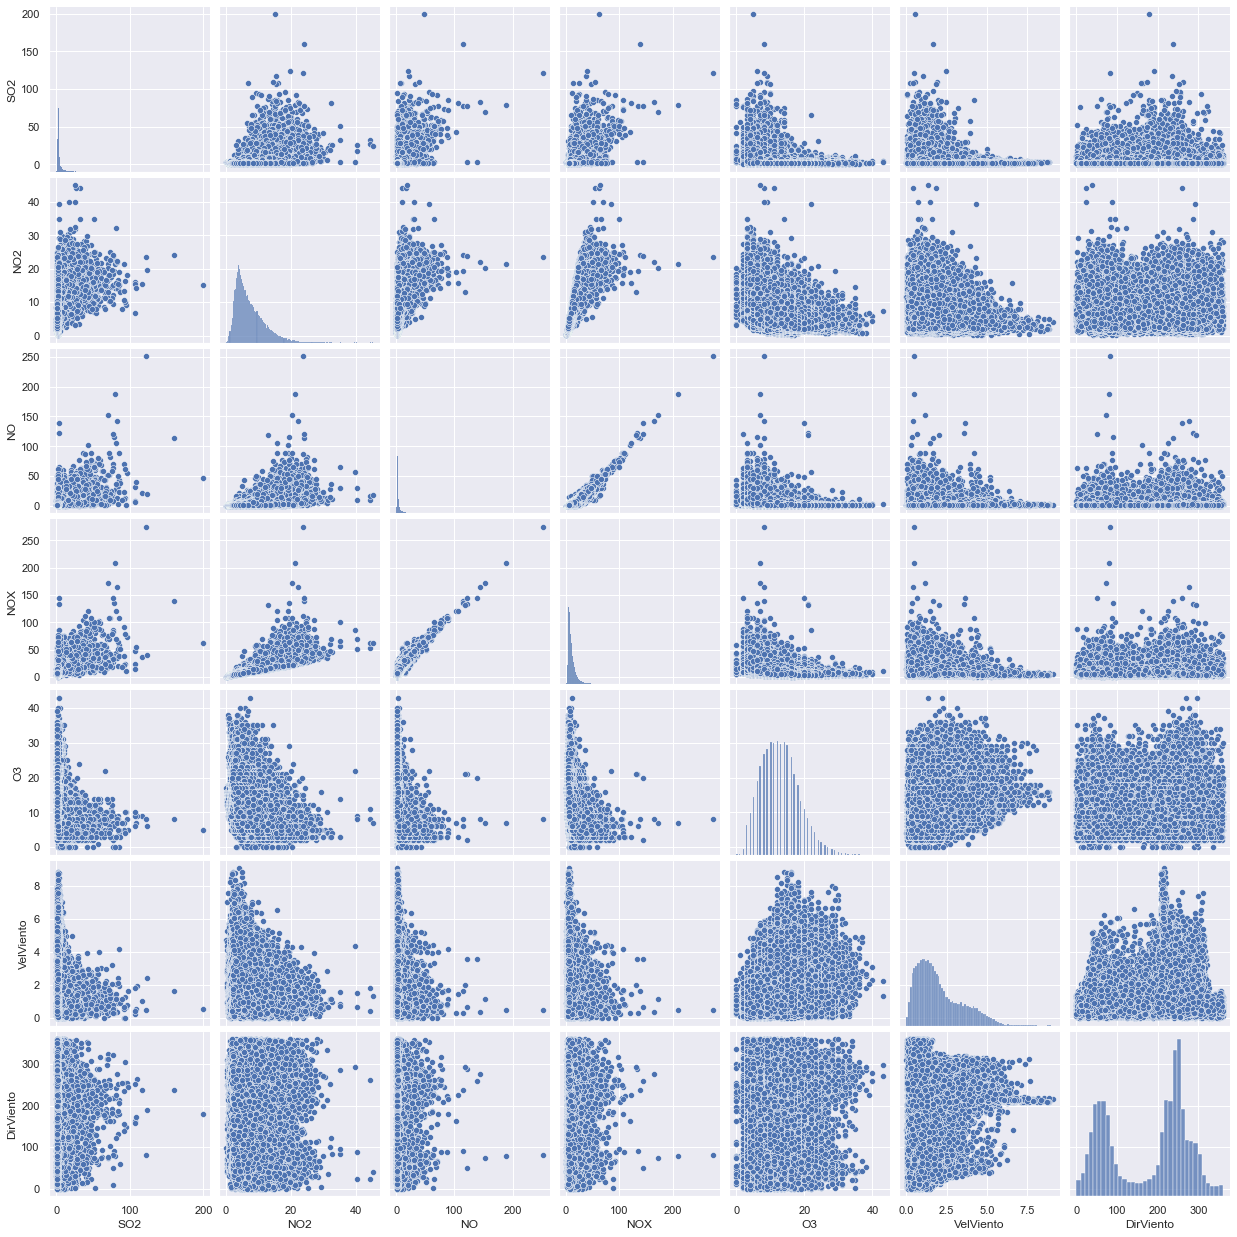

In [16]:
sns.pairplot(data_df)
plt.show()

#### Matriz de confusion

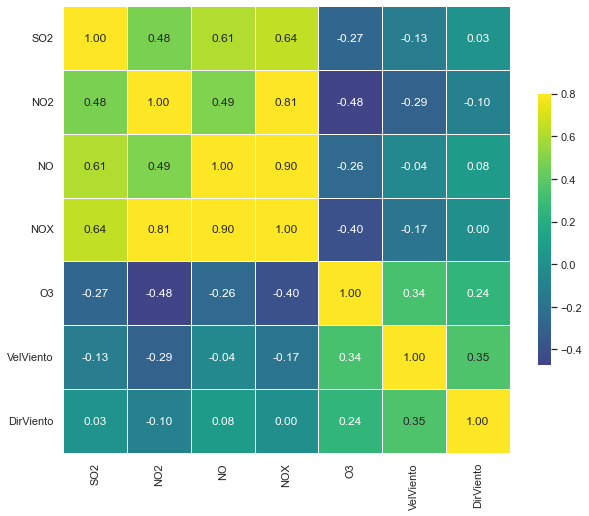

In [17]:
conf_matrix(data_df)

### Trends

In [18]:
chosen_col = "SO2"

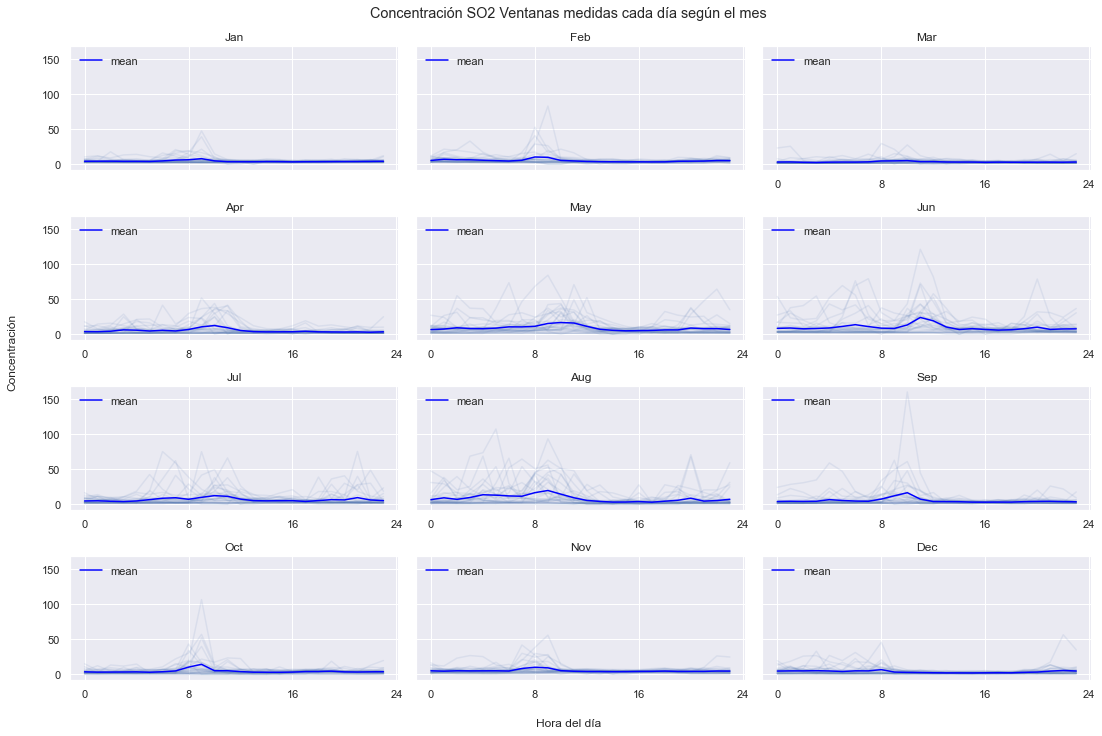

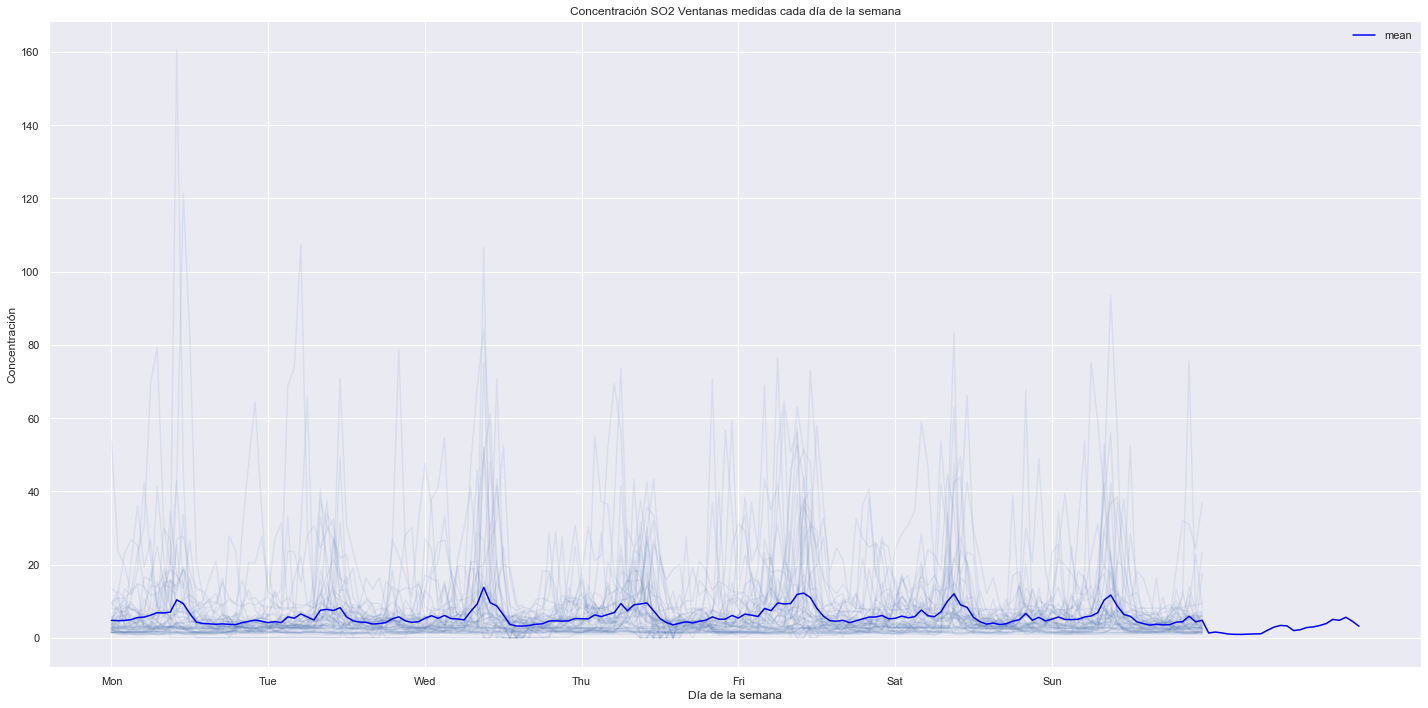

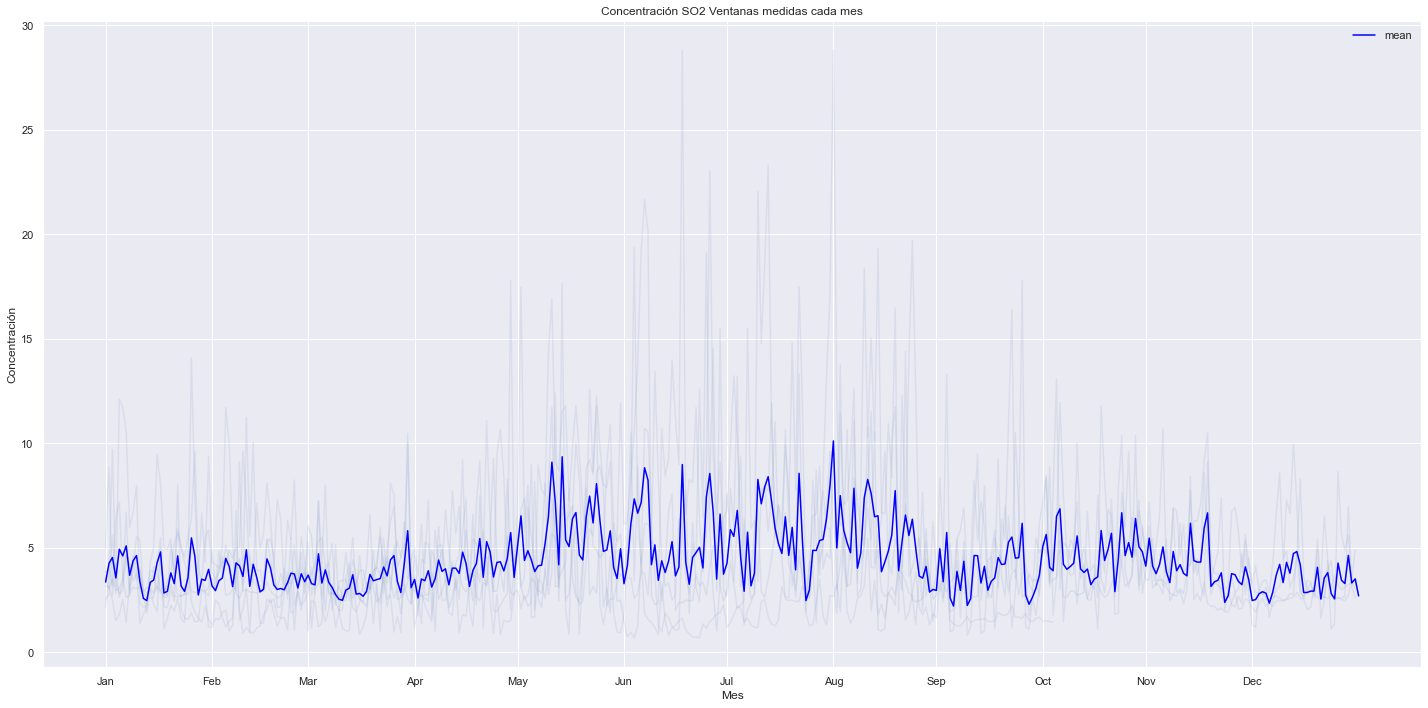

In [19]:
visualizar_trends(data_df, col = chosen_col, ano_0=2018, title='Concentración {} Ventanas'.format(chosen_col))

### Estadísticos por períodos

#### Anual

In [20]:
time_describe(data_df, col=chosen_col, res='y', from_date=data_df.index[0], to_date=data_df.index[-1], highlights=True)

#### Mensual

In [21]:
time_describe(data_df, col=chosen_col, res='m', from_date=data_df.index[0], to_date=data_df.index[-1])

SO2                                                        
     count      mean       std   min     25%   50%     75%     max
m                                                                 
01  3679.0  3.347336  3.139707  0.80  2.4250  2.76  3.3800   65.63
02  3347.0  3.366651  3.775317  0.73  1.5950  2.77  3.4000   83.20
03  3651.0  3.342720  3.984532  0.65  1.7000  2.61  3.2450   91.63
04  3568.0  4.024313  5.772193  0.70  1.7400  2.71  3.8800  199.11
05  3688.0  5.612893  7.377929  0.37  2.2900  3.17  6.0200  108.97
06  3566.0  5.388278  8.403052  0.35  1.8100  2.90  5.1900  121.42
07  3672.0  5.625648  8.251644  1.01  2.3275  3.12  5.4825  123.48
08  3655.0  5.449294  8.548037  0.75  2.0900  2.99  4.8250  107.63
09  3566.0  3.846113  5.916391  0.07  1.5600  2.69  3.4000  160.50
10  3668.0  4.976260  6.761011  0.08  2.6400  3.05  4.5700  106.74
11  3570.0  4.249218  5.134764  0.98  2.5500  2.95  4.2400  116.99
12  3680.0  3.535992  3.336019  0.88  2.4700  2.71  3.3600   56.57

#### Diario

In [22]:
time_describe(data_df, col=chosen_col, res='d', from_date=data_df.index[0], to_date=data_df.index[-1])

SO2                                                         
     count      mean       std   min     25%    50%     75%     max
d                                                                  
01  1433.0  4.488381  6.492010  0.73  2.2300  2.890  4.2700   85.18
02  1422.0  4.151090  5.792917  0.64  2.0600  2.890  3.8800   84.36
03  1431.0  4.914151  8.023462  0.59  2.3700  2.930  4.3800  160.50
04  1421.0  4.349937  6.007758  0.38  2.1500  2.840  4.0800   97.22
05  1422.0  4.135148  4.621150  0.07  2.1425  2.845  4.0600   46.39
06  1423.0  4.063914  5.752387  0.56  1.9900  2.750  3.5750   85.84
07  1415.0  4.350269  6.427128  0.75  2.0200  2.730  3.5750   69.58
08  1398.0  4.575987  7.029518  0.55  2.4200  2.880  4.0775  116.99
09  1415.0  4.375032  5.722285  0.49  2.4150  2.940  4.0600   77.28
10  1427.0  4.966973  7.630761  0.61  2.3050  2.850  4.2650   93.20
11  1415.0  4.705477  5.844040  0.48  2.3700  2.840  4.4650   73.07
12  1420.0  4.596331  6.261788  0.76  2.4500  2.880  4.3500   78.88
13  1426.0  4.500386  6.311741  0.75  2.3900  2.930  4.2275   86.44
14  1420.0  5.031676  7.477218  0.65  2.4000  2.920  4.6825  107.55
15  1422.0  3.874100  4.670769  0.74  1.8900  2.700  3.7000   70.95
16  1424.0  3.813237  4.954380  0.37  1.8700  2.780  3.7625  109.98
17  1428.0  4.341744  5.413610  0.10  2.2800  2.920  4.2625   67.80
18  1431.0  4.863746  7.980171  0.66  2.2800  2.800  4.3700  121.42
19  1424.0  4.177739  6.249498  0.29  2.3100  2.730  3.7000   93.51
20  1429.0  4.224822  5.094808  0.49  2.3700  2.830  4.0300   62.32
21  1427.0  4.240434  4.996438  0.64  2.3300  2.820  4.1850   72.25
22  1427.0  5.226636  8.384817  0.10  2.2350  2.840  4.5100  107.63
23  1431.0  4.305164  5.667146  0.08  2.1100  2.730  4.2100   77.78
24  1420.0  4.015852  5.598459  0.58  1.9975  2.740  3.6325   68.79
25  1425.0  4.664204  6.561613  0.73  2.0200  2.810  4.4300   82.12
26  1425.0  4.382744  6.290842  0.63  2.0700  2.770  4.1900   91.40
27  1435.0  4.271073  5.150571  0.71  2.0600  2.910  4.2350   53.39
28  1423.0  4.149951  6.886993  0.71  2.0250  2.840  3.8200  199.11
29  1317.0  4.311777  6.482872  0.83  2.3800  2.860  3.8600   94.15
30  1304.0  4.103267  4.790311  0.85  2.3675  2.930  4.0600   60.81
31   830.0  4.315651  6.667924  0.80  2.3350  2.895  4.0400  123.48

### Clustering

In [37]:
X_total, X_train, fechas = generate_data_clustering(data_df, chosen_col, years = [2018, 2019, 2021, 2022], window = [(1,1,2021), (12,12,2021)])

Euclidean KMeans
478.295 --> 394.927 --> 392.622 --> 392.560 --> 392.560 --> 


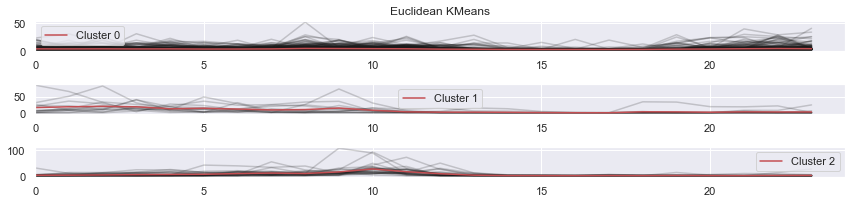

In [78]:
N_clusters = 3
y_pred, km = test_clusterings(X_train, N_clusters, "Euclidean KMeans")
#y_pred, km = test_clusterings(X_train, N_clusters, "Soft-DTW KMeans")
#y_pred, km = test_clusterings(X_train, N_clusters, "DBA KMeans")

In [79]:
#Las fechas de los eventos interesantes
fechas_interesantes = [(19,8,2018), (1,10,2019), (6,6,2022)]
ts_dias = [X_total[fechas[f]] for f in fechas_interesantes]

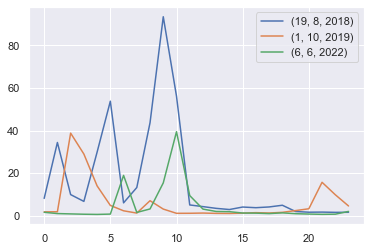

In [80]:
for i, s in enumerate(ts_dias):
    plt.plot(range(24), s, label = "{}".format(fechas_interesantes[i]))
plt.legend()
plt.show()

In [81]:
km.predict(ts_dias)

C:\Users\javie\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 3 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([2, 1, 2], dtype=int64)